../training_output/Gauss_0_noise
../training_output/Gauss_10_noise
../training_output/Laplace_0_noise
../training_output/Laplace_10_noise


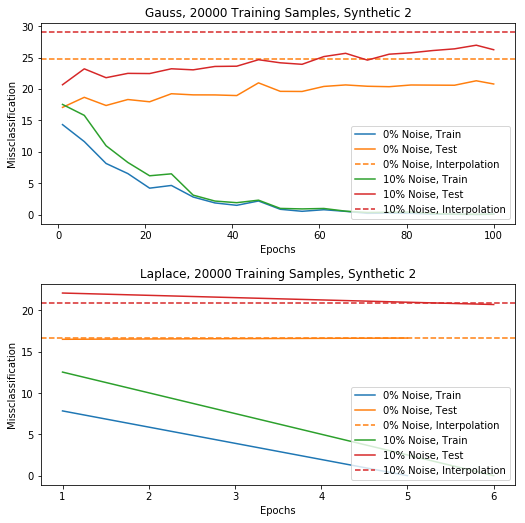

In [56]:

import glob
files = glob.glob("../training_output/*")
files.sort()


all_outputs = {}


for filename in files:

    print(filename)
    
    output = {}
    sgd = {}

    with open(filename, 'r') as fh:
        
        skip = 23
        for line in fh:
            
            skip -= 1
            if skip > 0:
                continue
            
            numbers = []
            for s in line.split():
                try:
                    numbers.append(float(s))
                except ValueError:
                    pass
                
            if len(numbers) == 4:
                sgd[numbers[2]] = (numbers[0], numbers[1])
                
            if len(numbers) == 1:
                output['lin'] = numbers[0]
                output['sgd'] = sgd
        
        
    all_outputs[filename] = output
    
        
    
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
fig.subplots_adjust(hspace=0.3)
ax = plt.gca()
fig.set_size_inches(8.5, 8.5)
    
for index, kernel in enumerate(['Gauss', 'Laplace']):
    
    ax.set_prop_cycle(None)
    
    for key, value in all_outputs.items():
        
        dic = value['sgd']
        
        if not kernel in key:
            continue
            
        if '10_noise' in key:
            noise = 10
        else:
            noise = 0        

        epoch = [x for x in dic.keys()]
        train   = [x[0] for x in dic.values()]
        test  = [x[1] for x in dic.values()]

        color = next(ax._get_lines.prop_cycler)['color']
        axs[index].plot(epoch, train, label=str(noise) + '% Noise, Train', color=color)  
        color = next(ax._get_lines.prop_cycler)['color']
        axs[index].plot(epoch, test, label=str(noise) + '% Noise, Test', color=color)      
        axs[index].axhline(y=value['lin'] * 100, label=str(noise) + '% Noise, Interpolation', linestyle='--', color=color)

    axs[index].set_xlabel('Epochs')
    axs[index].set_ylabel('Missclassification')
    axs[index].legend(loc='lower right')
    axs[index].set_title(kernel + ', 20000 Training Samples, Synthetic 2')
        
    import matplotlib2tikz
    filename = '../tikz/Overfit_Synthetic2.tex'
    matplotlib2tikz.save(filename)        

    filename = '../png/Overfit_Synthetic2.png'
    plt.savefig(filename)

plt.show()


In [50]:
#del trainers_dict